# Visor de cajas ancla

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [8]:
import pathlib
import numpy as np
from torchvision.models.detection.transform import GeneralizedRCNNTransform
from datasets import ObjectDetectionDataSet
from transformations import Clip, ComposeDouble, FunctionWrapperDouble, normalize_01
from utils import get_filenames_of_path, read_json, read_pt
from visual import AnchorViewer

In [29]:
# Directorio de información
root = pathlib.Path('../data/ChestXRay8')

# Archivos de imágenes y etiquetas
inputs = get_filenames_of_path(root / 'ChestBBImages')
targets = get_filenames_of_path(root / 'ChestBBLabels')

inputs.sort(), print('Numero de imagenes: ', len(inputs))
targets.sort(), print('Numero de etiquetas: ', len(inputs))

Numero de imagenes:  880
Numero de etiquetas:  880


(None, None)

In [33]:
# Mapeo de etiquetas a calor numérico
mapping = read_json(pathlib.Path('LabelsMappping.json'))
print('Etiqwetas de padecimeintos: ')
mapping

Etiqwetas de padecimeintos: 


{'Infiltrate': 0,
 'Atelectasis': 1,
 'Pneumonia': 2,
 'Cardiomegaly': 3,
 'Effusion': 4,
 'Pneumothorax': 5,
 'Mass': 6,
 'Nodule': 7}

In [13]:
# transformaciones
transforms = ComposeDouble([
    Clip(),
    # AlbumentationWrapper(albumentation=A.HorizontalFlip(p=0.5)),
    # AlbumentationWrapper(albumentation=A.RandomScale(p=0.5, scale_limit=0.5)),
    # AlbumentationWrapper(albumentation=A.VerticalFlip(p=0.5)),
    FunctionWrapperDouble(np.moveaxis, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01) # normalización a media 0 y std 1
])

In [63]:
# Construcción del conjunto de datos
dataset = ObjectDetectionDataSet(inputs=inputs,
                                 targets=targets,
                                 transform=transforms,
                                 add_dim = True,
                                 use_cache=False,
                                 convert_to_format=None,
                                 mapping=mapping)
print('Ejemplo de instancia del conjunto de datos: \n Imagenes: {} \n Cajas delimitadoras(etiquetas): {} \n Etiquetas:{} \n Archivos {} y {}'.format(dataset[878]['x'],dataset[878]['y']['boxes'], dataset[878]['y']['labels'],dataset[878]['x_name'], dataset[878]['y_name']))


Ejemplo de instancia del conjunto de datos: 
 Imagenes: tensor([[[0.0000, 0.0078, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         [0.0000, 0.0078, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         [0.0000, 0.0078, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         ...,
         [0.0000, 0.0078, 0.0118,  ..., 0.0824, 0.0824, 0.0902],
         [0.0000, 0.0078, 0.0118,  ..., 0.0902, 0.0941, 0.0902],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]) 
 Cajas delimitadoras(etiquetas): tensor([[612., 459., 836., 593.],
        [611., 440., 770., 591.]], dtype=torch.float64) 
 Etiquetas:tensor([0., 1.], dtype=torch.float64) 
 Archivos 00030636_004.png y 00030636_004.json


In [19]:
# transformaciones
transform = GeneralizedRCNNTransform(min_size=1024,
                                     max_size=1024,
                                     image_mean=[0.485, 0.456, 0.406],
                                     image_std=[0.229, 0.224, 0.225])

In [28]:
image = dataset[50]['x']  # Instancia del conjunto de datos para detección 
feature_map_size = (512, 32, 32)
anchorviewer = AnchorViewer(image=image,
                            rcnn_transform=transform,
                            feature_map_size=feature_map_size,
                            anchor_size=((128, 256, 512),),
                            aspect_ratios=((0.5, 1.0, 2.0),)
                            )
anchorviewer.napari() # Con esto debe salir una ventana extra con el visor de imagenes

**Ejemplo de Visualización:** Una imagen del conjunto de datos con las transformaciones seleccionadas de formato, redimensión y normalización. Todo a traves del visor de imagenes *napari*. La imagen contiene dos capas extras, una que representa los puntos donde se ubicaran las cajas ancla intentando identificar un padecimiento, asi como un ejemplo de las cajas ancla con de acuerdo a las especificaciones dadas, tal como número de cajas, de acuerdo a los tamaños y las relaciones de forma que se indiquen.

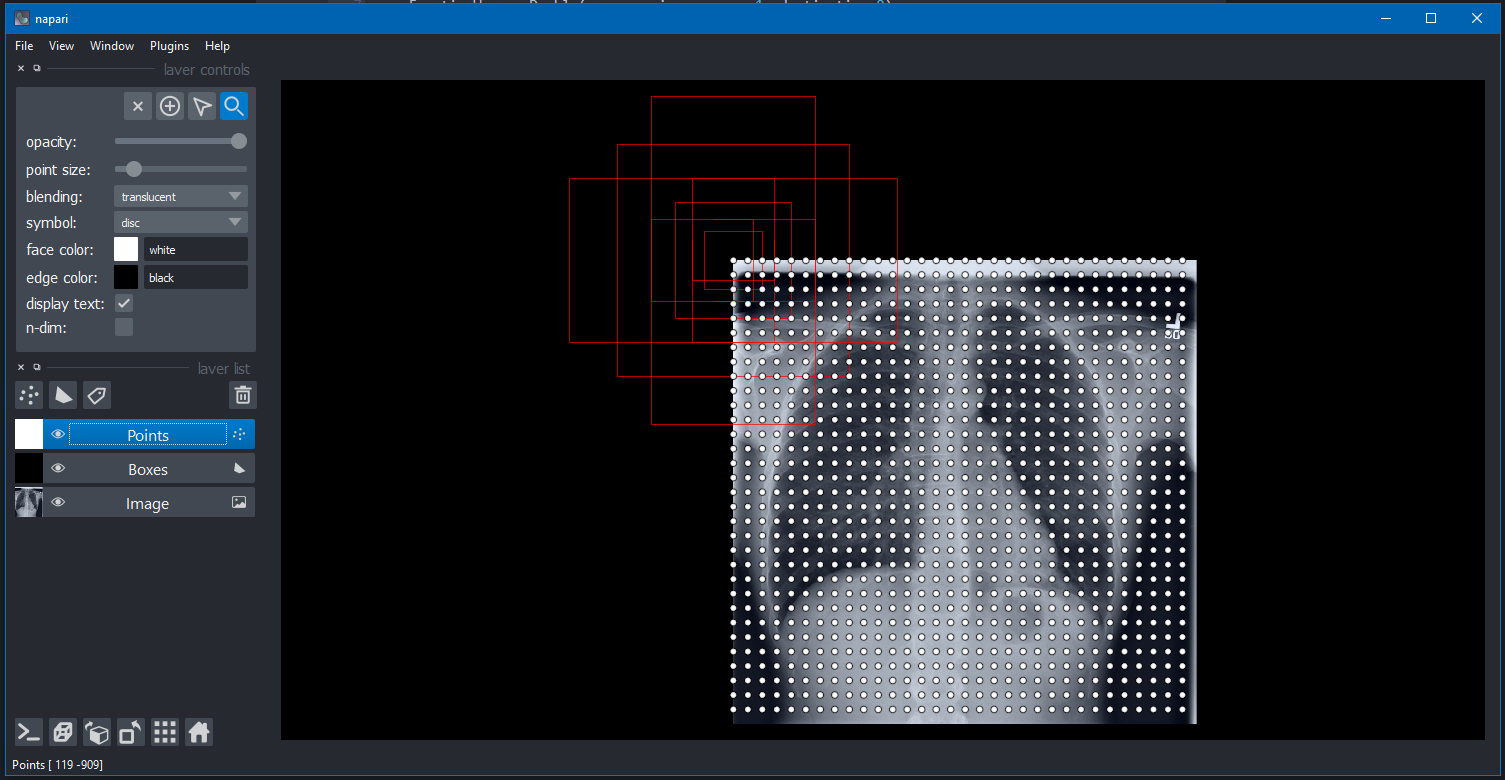